# Table of Contents


    Question:
06. Visualizations.
07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
08. & 09. Customers Profiles Across Regions and Departments with Visualizations
10. Export Data


# 06. Visualizations

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

In [2]:
# Set path
path = r'C:\Users\Goce\Desktop\Achievement 4 Python Fundamentals'

In [3]:
#importing data
active_cust_dpt = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'active_cust_dpt.pkl'))

In [5]:
#checking dataframe
active_cust_dpt.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,Income_Group,department,baby_stuff,alcohol,Family_Status_Flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,False,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,False,196,6,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants


In [6]:
active_cust_dpt.tail()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,Income_Group,department,baby_stuff,alcohol,Family_Status_Flag
30964559,61695,Male,Minnesota,43,4/1/2020,3,married,116924,2774777,7,5,10,7.0,False,30094,1,0,Rapid Result Pregnancy Test Kit,2,5.398438,Mid-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,8.398438,Low spender,7.0,Frequent customer,Midwest,High active,Middle-aged Adults,Medium Income,other,1,0,Married with Dependants
30964560,122741,Male,Michigan,24,4/1/2020,2,married,73357,1176009,1,5,17,NaN,True,29659,3,0,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964561,122741,Male,Michigan,24,4/1/2020,2,married,73357,1029013,2,3,11,5.0,False,29659,1,1,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964562,122741,Male,Michigan,24,4/1/2020,2,married,73357,456486,3,1,16,19.0,False,29659,1,1,Early Result Pregnancy Test,2,9.203125,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants
30964563,122741,Male,Michigan,24,4/1/2020,2,married,73357,456486,3,1,16,19.0,False,36066,2,0,SleepGels Nighttime Sleep Aid,2,13.296875,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,8.976562,Low spender,30.0,Non-frequent customer,Midwest,High active,Young Adults,Medium Income,other,0,0,Married with Dependants


In [4]:
# Set the max_columns option to None
pd.set_option('display.max_columns', None)

In [7]:
active_cust_dpt.shape

(30964564, 38)

In [8]:
#age group distrubution
user_distribution_by_age = active_cust_dpt.groupby(['age_group']).user_id.nunique().sort_index()












Text(0, 0.5, 'Number of Users')

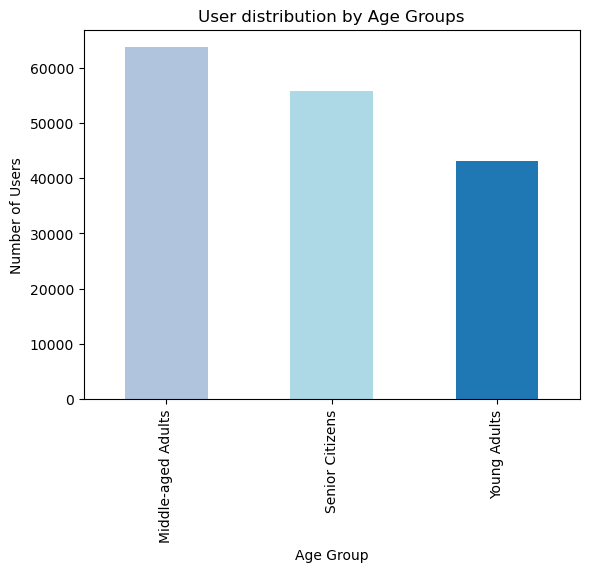

In [9]:
#bar chart user distribution by age groups
bar_user_distr_age=user_distribution_by_age.plot.bar(title='User distribution by Age Groups', color=['lightsteelblue', 'lightblue', 'tab:blue'])
plt.xlabel("Age Group")
plt.ylabel("Number of Users")



In [10]:
#checking the numbers
user_distribution_by_age

age_group
Middle-aged Adults    63707
Senior Citizens       55773
Young Adults          43151
Name: user_id, dtype: int64

In [288]:
# Count the occurrences 
orders_distribution_by_age = active_cust_dpt['age_group'].value_counts()

In [289]:
orders_distribution_by_age

Middle-aged Adults    12147765
Senior Citizens       10574504
Young Adults           8242295
Name: age_group, dtype: int64

Text(0, 0.5, 'Number of Orders in Milions')

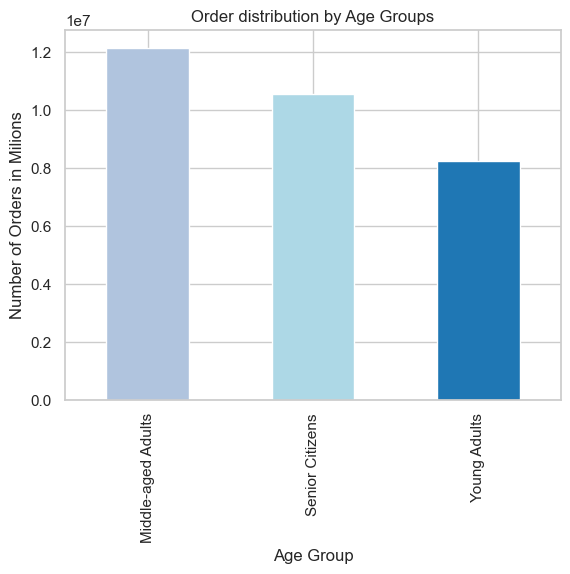

In [291]:
#bar chart order distribution by age groups
bar_order_distr_age=orders_distribution_by_age.plot.bar(title='Order distribution by Age Groups', color=['lightsteelblue', 'lightblue', 'tab:blue'])
plt.xlabel("Age Group")
plt.ylabel("Number of Orders in Milions")

In [11]:
# checking 'age_group' with 'order_frequency_flag status'

age_order_freq=pd.crosstab(active_cust_dpt['order_frequency_flag'],active_cust_dpt['age_group'],dropna=False)

In [12]:
age_order_freq

age_group,Middle-aged Adults,Senior Citizens,Young Adults
order_frequency_flag,,,
Frequent customer,8317998,7252218,5634260
Non-frequent customer,1137833,990538,766604
Regular customer,2691934,2331748,1841431


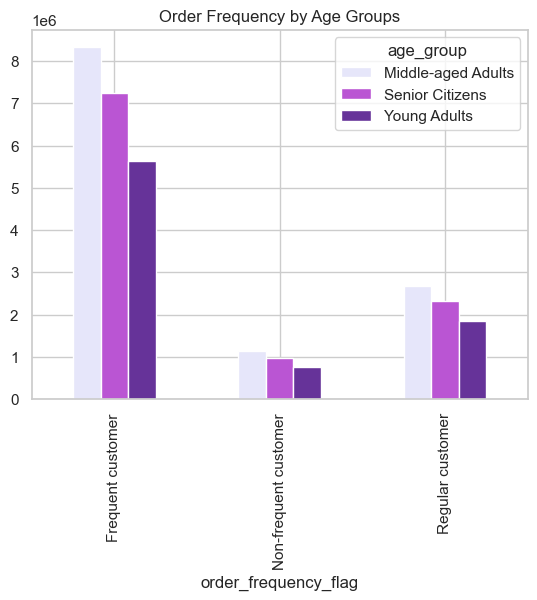

In [262]:
# visualizing the above 'age_order_freq' crosstab 

age_order_freq_bar=age_order_freq.plot.bar(title='Order Frequency by Age Groups',color=['lavender','mediumorchid','rebeccapurple'])

In [14]:
# checking 'age_group' with 'price_range_loc'

age_price_range=pd.crosstab(active_cust_dpt['price_range_loc'],active_cust_dpt['age_group'],dropna=False)

In [15]:
age_price_range

age_group,Middle-aged Adults,Senior Citizens,Young Adults
price_range_loc,,,
High-range product,155423,136932,105598
Low-range product,3796185,3302044,2576611
Mid-range product,8196157,7135528,5560086


In [16]:
# Extract the data for 'High-range product'
high_range_product_data = age_price_range.loc['High-range product']

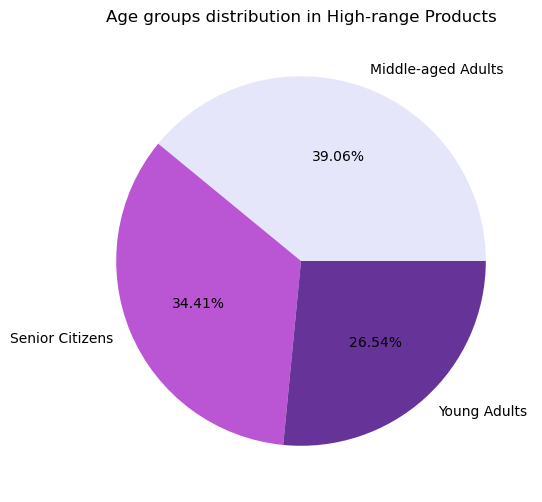

In [17]:
age_high_range_pie = plt.figure(figsize=(6, 6))
plt.pie(high_range_product_data, labels=high_range_product_data.index, autopct='%1.2f%%', colors=['lavender','mediumorchid','rebeccapurple'])
plt.title('Age groups distribution in High-range Products')
plt.show()


In [18]:
# Extract the data for 'Mid-range product'
mid_range_product_data = age_price_range.loc['Mid-range product']

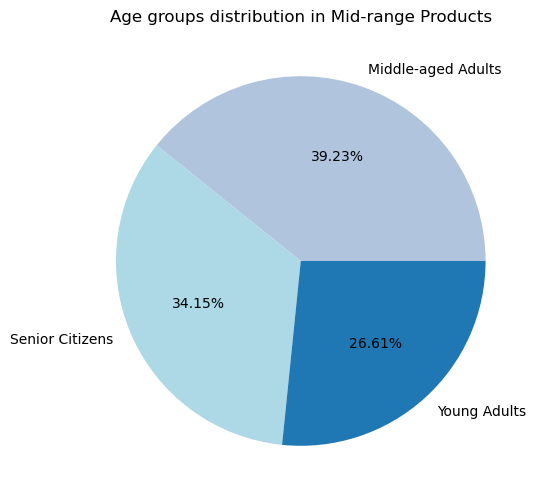

In [19]:
#creating pie chart
age_mid_range_pie = plt.figure(figsize=(6, 6))
plt.pie(mid_range_product_data, labels=mid_range_product_data.index, autopct='%1.2f%%', colors=['lightsteelblue', 'lightblue', 'tab:blue'])
plt.title('Age groups distribution in Mid-range Products')
plt.show()

In [20]:
# Extract the data for 'Mid-range product'
low_range_product_data = age_price_range.loc['Low-range product']

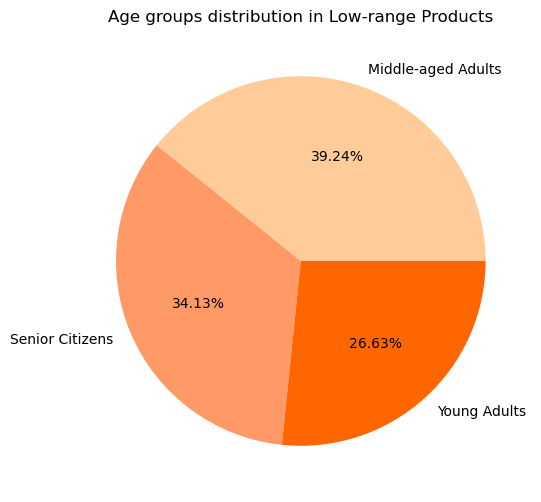

In [21]:
#creating pie chart
age_low_range_pie = plt.figure(figsize=(6, 6))
plt.pie(low_range_product_data, labels=low_range_product_data.index, autopct='%1.2f%%', colors=['#FFCC99', '#FF9966', '#FF6600'])
plt.title('Age groups distribution in Low-range Products')
plt.show()

In [22]:
# checking 'age_group' with 'department'

age_group_department=pd.crosstab(active_cust_dpt['department'],active_cust_dpt['age_group'],dropna=False)

In [23]:
age_group_department

age_group,Middle-aged Adults,Senior Citizens,Young Adults
department,,,
alcohol,56814,47596,40217
babies,164354,138738,107300
bakery,439661,382446,298721
beverages,1011215,883669,677017
breakfast,262776,227751,180323
bulk,13006,11424,9021
canned goods,396842,344447,270785
dairy eggs,2028369,1762512,1386301
deli,394029,343335,266470


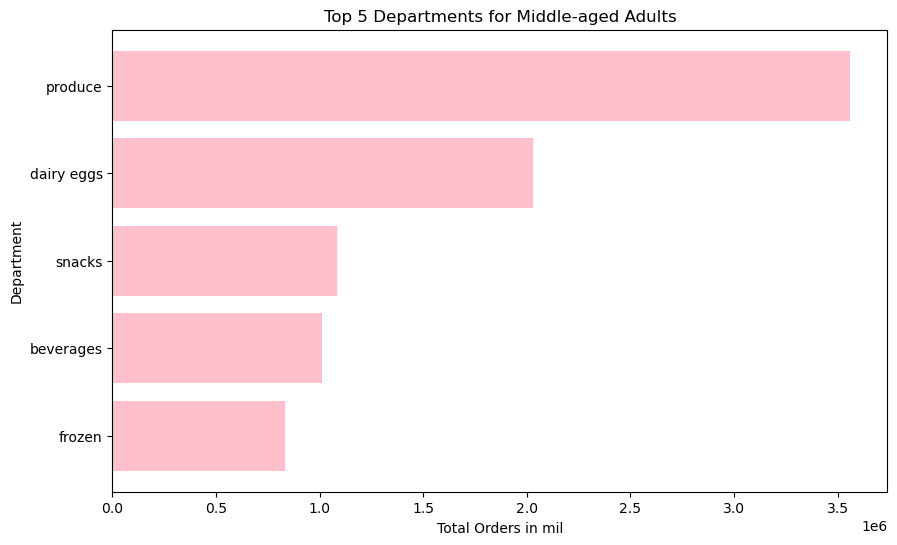

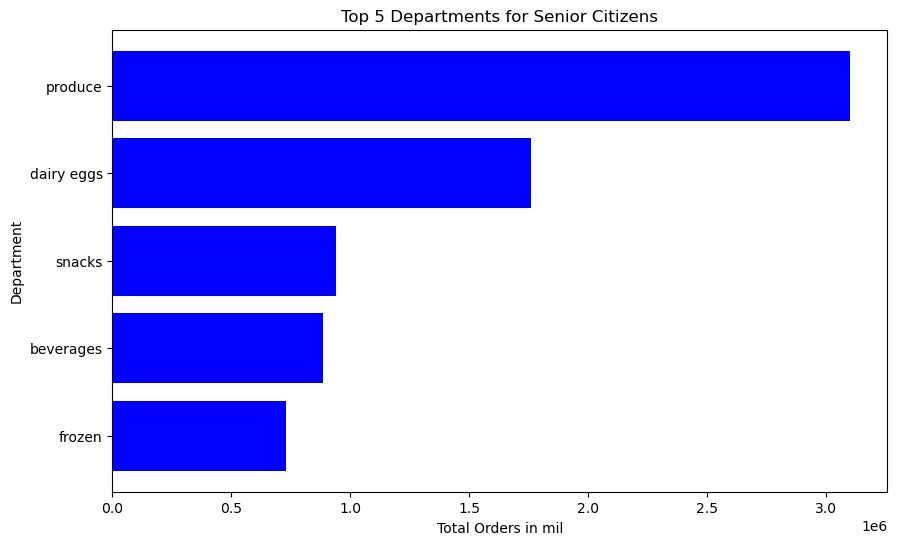

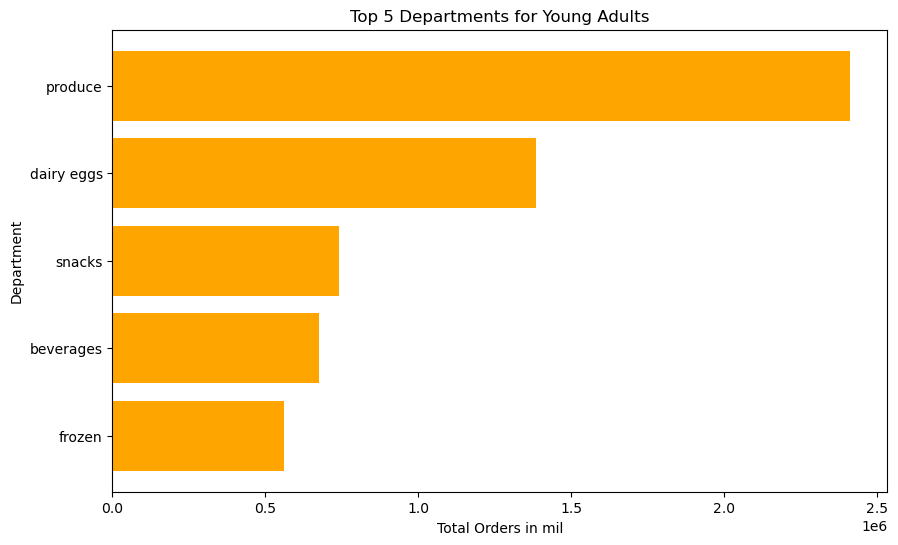

In [24]:

# Define monochromatic colors for each age group
colors = {
    'Middle-aged Adults': 'pink',
    'Senior Citizens': 'blue',
    'Young Adults': 'orange'
}

# Create a separate horizontal bar chart for each age group's top 5 departments
for age_group in age_group_department.columns:
    # Sort the departments by total orders
    top_departments = age_group_department[age_group].sort_values(ascending=False).head(5)
    
    # Create a horizontal bar chart
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_departments.index, top_departments, color=colors[age_group])
    plt.xlabel('Total Orders in mil')
    plt.ylabel('Department')
    plt.title(f'Top 5 Departments for {age_group}')
    
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    plt.show()


In [25]:

# Sort the departments by values in descending order for the "Middle-aged Adults" age group
age_group_department1 = age_group_department.sort_values(by='Middle-aged Adults', ascending=False)

In [26]:
age_group_department1

age_group,Middle-aged Adults,Senior Citizens,Young Adults
department,,,
produce,3562053,3104118,2413102
dairy eggs,2028369,1762512,1386301
snacks,1085447,940733,740226
beverages,1011215,883669,677017
frozen,831204,728963,561564
pantry,698279,609961,474465
bakery,439661,382446,298721
canned goods,396842,344447,270785
deli,394029,343335,266470


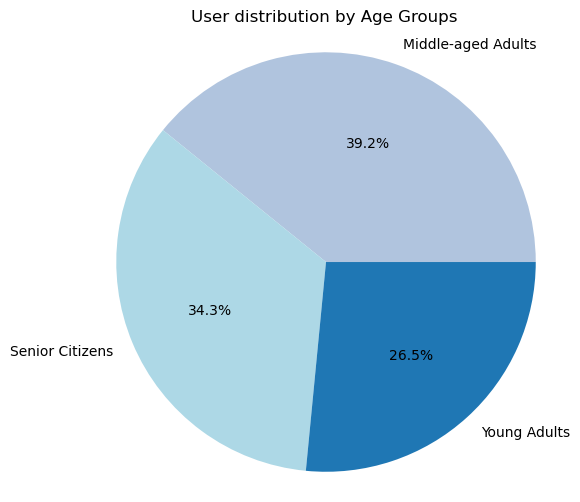

In [27]:
# Pie chart user distribution by age groups
plt.figure(figsize=(6, 6))  

# Create a pie chart
pie_user_distrib_by_age_groups=plt.pie(user_distribution_by_age, labels=user_distribution_by_age.index, autopct='%1.1f%%', colors=['lightsteelblue', 'lightblue', 'tab:blue'])
plt.title('User distribution by Age Groups')

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

plt.show()

In [77]:
# Exporting  bar chart for user distribution by age groups
bar_user_distr_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_user_distr_age.png'))

In [78]:
# Exporting  bar chart for age_order_freq
age_order_freq_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_order_freq_bar.png'))

In [79]:
# Exporting  pie high range products by age groups
age_high_range_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_high_range_pie.png'))

In [80]:
# Exporting  pie mid range products by age groups
age_mid_range_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_mid_range_pie.png'))

In [81]:
# Exporting  pie low range products by age groups
age_low_range_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_low_range_pie.png'))

In [28]:
# checking 'spending_flag' with 'number_of_dependants status'

xcross_spending_dependants=pd.crosstab(active_cust_dpt['spending_flag'],active_cust_dpt['number_of_dependants'],dropna=False)

In [29]:
xcross_spending_dependants

number_of_dependants,0,1,2,3
spending_flag,,,,
High spender,27709,21354,23457,25219
Low spender,7711972,7697752,7709804,7747297


In [30]:
xcross_spending_dependants = pd.crosstab(
    active_cust_dpt['spending_flag'],
    active_cust_dpt['number_of_dependants'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [31]:
xcross_spending_dependants

number_of_dependants,0,1,2,3
spending_flag,,,,
High spender,517,442,483,481
Low spender,40210,40247,40120,40131


In [32]:
# Define the categories (number of dependants) and the data
categories = xcross_spending_dependants.columns
high_spenders = xcross_spending_dependants.loc['High spender']
low_spenders = xcross_spending_dependants.loc['Low spender']

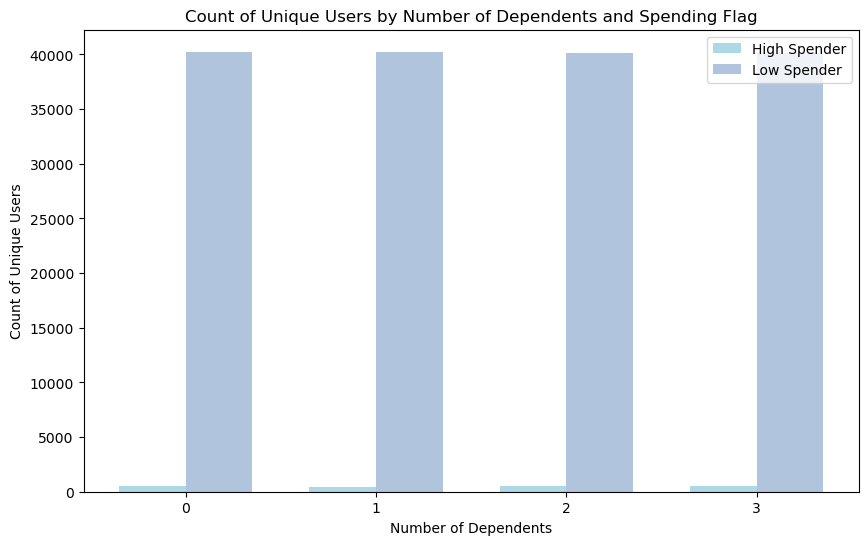

In [33]:
# Define the bar width
bar_width = 0.35
index = np.arange(len(categories))

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors
colors = ['lightsteelblue', 'lightblue', 'tab:blue', 'tab:blue']

# Create the bar chart
spending_dependants1=ax.bar(index - bar_width/2, high_spenders, bar_width, label='High Spender', color='lightblue')
spending_dependants1=ax.bar(index + bar_width/2, low_spenders, bar_width, label='Low Spender', color='lightsteelblue')

# Add labels and title
ax.set_xlabel('Number of Dependents')
ax.set_ylabel('Count of Unique Users')
ax.set_title('Count of Unique Users by Number of Dependents and Spending Flag')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

#Spenders by income groups

In [264]:
#income distrubution
user_distribution_by_income = active_cust_dpt.groupby(['Income_Group']).user_id.nunique().sort_index()

In [265]:
user_distribution_by_income

Income_Group
High Income      36393
Low Income       52039
Medium Income    74199
Name: user_id, dtype: int64

Text(0, 0.5, '')

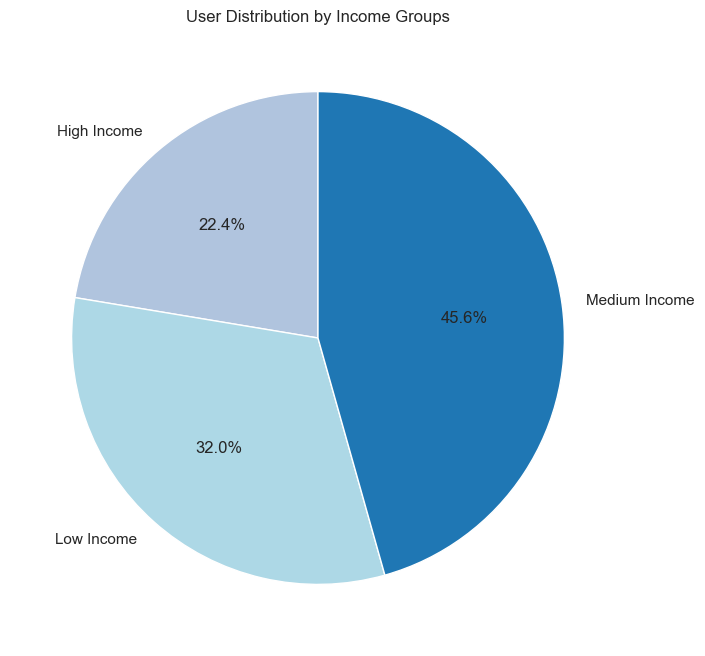

In [267]:
# Create a pie chart
user_distribution_income=plt.figure(figsize=(8, 8))  # Set the figure size
user_distribution_by_income.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightsteelblue', 'lightblue', 'tab:blue'])

# Set the title
plt.title('User Distribution by Income Groups')

# Remove the y-axis label
plt.ylabel('')

In [269]:
# Exporting chart 
user_distribution_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'user_distribution_income_pie.png'))

In [1]:
#order distrubution by income
order_distribution_by_income = active_cust_dpt(['Income_Group']).value_counts()

NameError: name 'active_cust_dpt' is not defined

In [ ]:
order_distribution_by_income

In [ ]:
# Create a pie chart
order_distribution_by_income=plt.figure(figsize=(8, 8))  # Set the figure size
order_distribution_by_income.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lavender','mediumorchid','rebeccapurple'])

# Set the title
plt.title('Order Distribution by Income Groups')

# Remove the y-axis label
plt.ylabel('')

In [34]:
xcross_spending_by_income_groups1 = pd.crosstab(
    active_cust_dpt['spending_flag'],
    active_cust_dpt['Income_Group'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [35]:
xcross_spending_by_income_groups1

Income_Group,High Income,Low Income,Medium Income
spending_flag,,,
High spender,513,364,1046
Low spender,35880,51675,73153


In [36]:
# Extract the data for 'High-income'
high_spender= xcross_spending_by_income_groups1.loc['High spender']

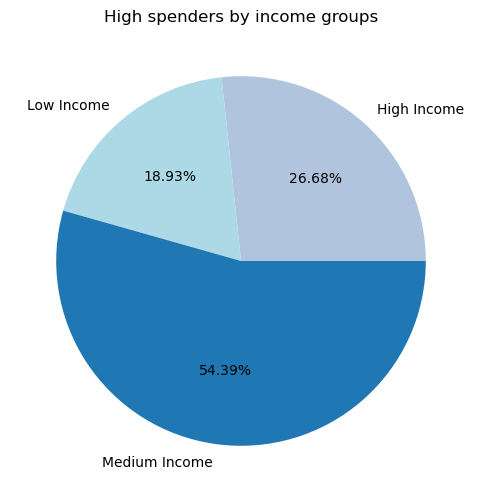

In [37]:
#creating pie chart
high_spender_pie = plt.figure(figsize=(6, 6))
plt.pie(high_spender, labels=high_spender.index, autopct='%1.2f%%', colors=['lightsteelblue', 'lightblue', 'tab:blue'])
plt.title('High spenders by income groups')
plt.show()

In [50]:
# Exporting chart 
high_spender_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'high_spender_pie.png'))

Income groups and frequency of orders 

In [53]:
xcross_order_frequency_income_groups = pd.crosstab(
    active_cust_dpt['order_frequency_flag'],
    active_cust_dpt['Income_Group'],
    dropna=False,
    
)

In [54]:
xcross_order_frequency_income_groups

Income_Group,High Income,Low Income,Medium Income
order_frequency_flag,,,
Frequent customer,5101713,5766105,10336658
Non-frequent customer,665020,855564,1374391
Regular customer,1634681,1898864,3331568


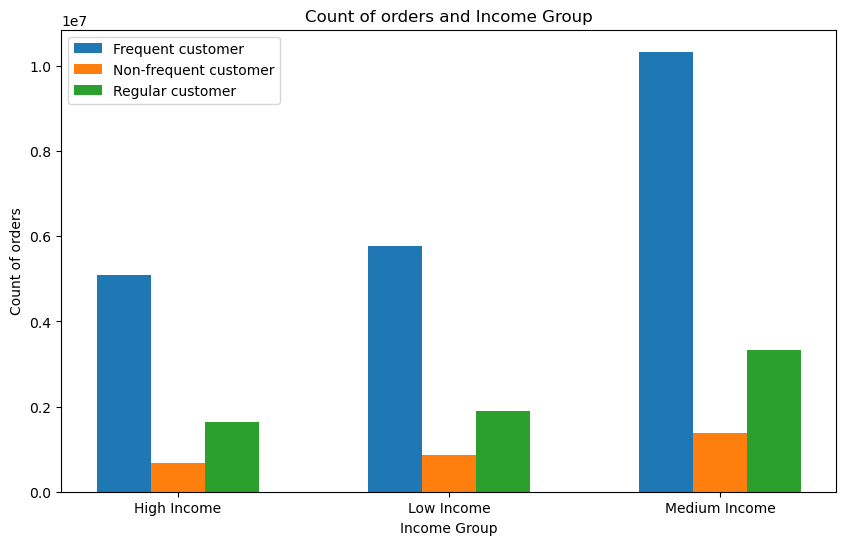

In [58]:
# Define the order frequency flags and income groups
order_frequency_flags = xcross_order_frequency_income_groups.index
income_groups = xcross_order_frequency_income_groups.columns

# Extract the data for each order frequency flag
frequent_customer = xcross_order_frequency_income_groups.loc['Frequent customer']
non_frequent_customer = xcross_order_frequency_income_groups.loc['Non-frequent customer']
regular_customer = xcross_order_frequency_income_groups.loc['Regular customer']

# Define bar width and positions
bar_width = 0.2
index = np.arange(len(income_groups))

# Create a named figure
bar_income_orders = plt.figure("order_frequency_income_chart", figsize=(10, 6))

# Create the clustered bar chart
plt.bar(index - bar_width, frequent_customer, bar_width, label='Frequent customer')
plt.bar(index, non_frequent_customer, bar_width, label='Non-frequent customer')
plt.bar(index + bar_width, regular_customer, bar_width, label='Regular customer')

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('Count of orders')
plt.title('Count of orders and Income Group')
plt.xticks(index, income_groups)
plt.legend()

# Save the chart with a unique name
chart_name = "order_frequency_income_chart.png"
plt.savefig(chart_name)

# Show the chart
plt.show()

In [59]:
# Exporting chart 
bar_income_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_orders.png'))

 income groups and days of order

In [41]:
xcross_order_day_of_week_income_groups = pd.crosstab(
    active_cust_dpt['orders_day_of_week'],
    active_cust_dpt['Income_Group'],
    dropna=False,
    values=active_cust_dpt['user_id'],  # Assuming 'user_id' is a unique identifier for each user
    aggfunc='nunique'
)

In [42]:
xcross_order_day_of_week_income_groups

Income_Group,High Income,Low Income,Medium Income
orders_day_of_week,,,
0,29125,37110,59005
1,29578,42050,60554
2,27768,39470,56436
3,26799,38299,54794
4,26359,37655,53645
5,26800,37735,54372
6,26118,33350,52892


In [ ]:
including also hours of day

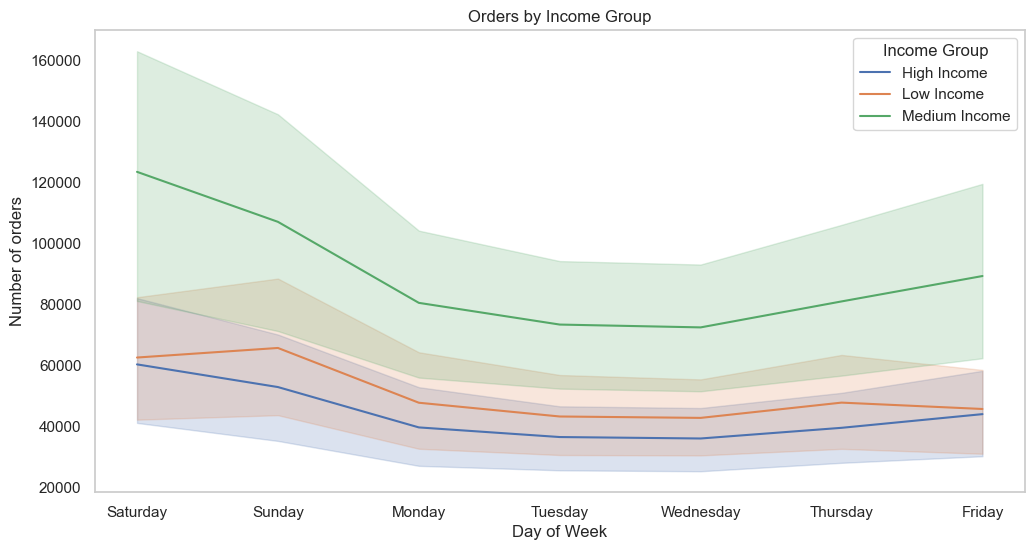

In [259]:
# Reset the MultiIndex to make it a regular DataFrame
xcross_income_hours_reset = xcross_income_hours.reset_index()

# Define a list of day names corresponding to the numerical values (0-6)
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Get a list of all income group columns (excluding the day of the week and hour of the day columns)
income_group_columns = xcross_income_hours_reset.columns[2:]

# Create a line plot for each income group
line__income_days_of_week1=plt.figure(figsize=(12, 6))
for income_group in income_group_columns:
    sns.lineplot(data=xcross_income_hours_reset, x='orders_day_of_week', y=income_group, label=income_group, markers=True)

plt.title("Orders by Income Group")
plt.xlabel("Day of Week")
plt.ylabel("Number of orders")
plt.xticks(range(7), day_names)  # Set custom day names as x-axis labels
plt.legend(title="Income Group")
plt.grid()
plt.show()

# QUESTION 1 IMPORTANT BUSIEST DAYS BY INCOME GROUPS 

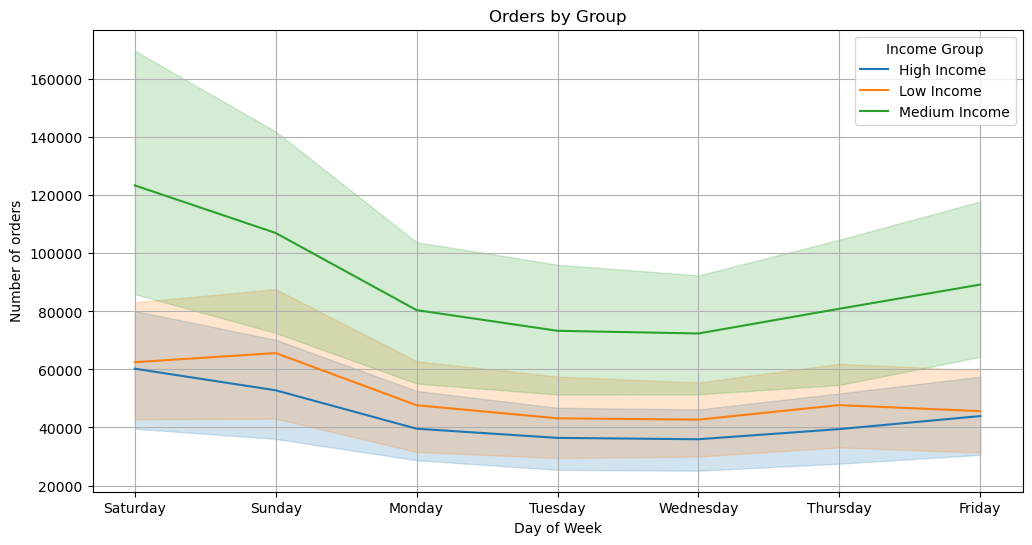

In [64]:
line__income_days_of_week1

In [65]:
# Exporting chart 
line__income_days_of_week1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line__income_days_of_week1.png'))

# BUSIEST HOURS OF THE DAY BY INCOME GROUP

In [85]:
xcross_income_busiest_hours = pd.crosstab(
    active_cust_dpt['order_hour_of_day'],
    active_cust_dpt['Income_Group'],
    dropna=False,
    
)

In [86]:
xcross_income_busiest_hours

Income_Group,High Income,Low Income,Medium Income
order_hour_of_day,,,
0,48822,55708,103512
1,24970,29479,55172
2,15750,19145,30796
3,11498,13499,23799
4,12490,13794,24479
5,20209,22551,41658
6,67091,76006,137916
7,206366,228945,427902
8,395498,456731,806881


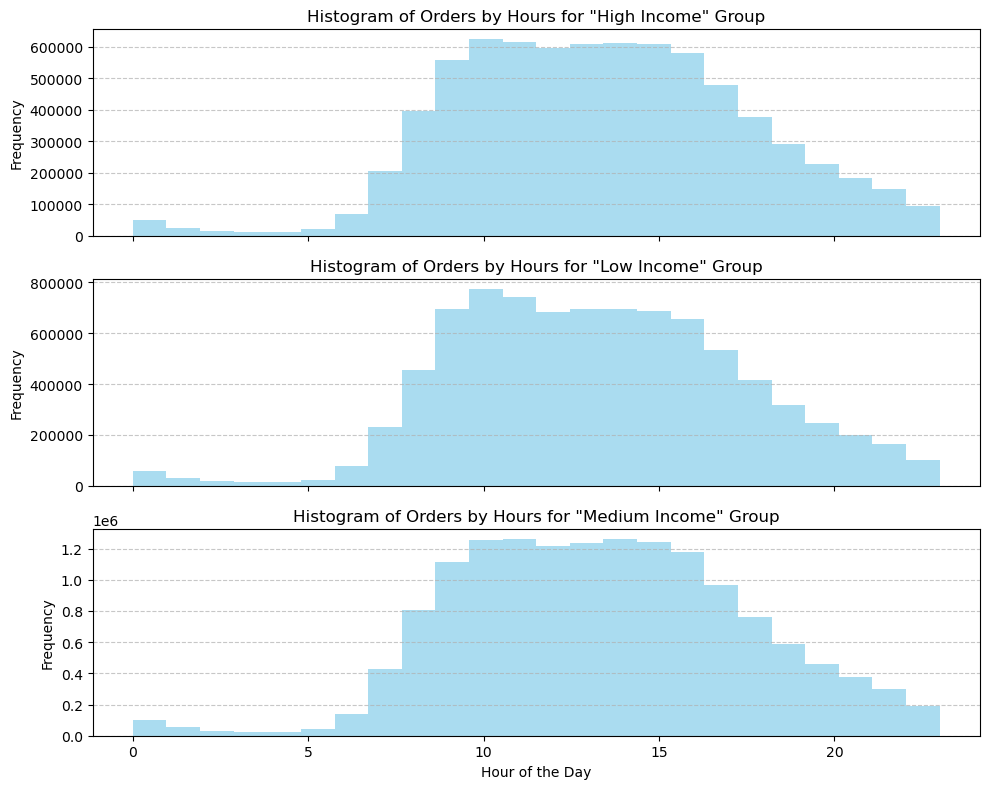

In [98]:
# Get a list of unique income groups
income_groups = active_cust_dpt['Income_Group'].unique()

# Create subplots for each income group
hist_income=fig, axs = plt.subplots(len(income_groups), figsize=(10, 8), sharex=True)
for i, income_group in enumerate(income_groups):
    # Select data for the current income group
    income_group_data = xcross_income_busiest_hours[income_group]
    
    # Create a histogram for the current income group
    axs[i].hist(income_group_data.index, bins=24, weights=income_group_data, color='skyblue', alpha=0.7)
    axs[i].set_title(f'Histogram of Orders by Hours for "{income_group}" Group')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a common x-axis label
plt.xlabel('Hour of the Day')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [99]:
hist_income

(<Figure size 1000x800 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Histogram of Orders by Hours for "High Income" Group'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'Histogram of Orders by Hours for "Low Income" Group'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'Histogram of Orders by Hours for "Medium Income" Group'}, xlabel='Hour of the Day', ylabel='Frequency'>],
       dtype=object))

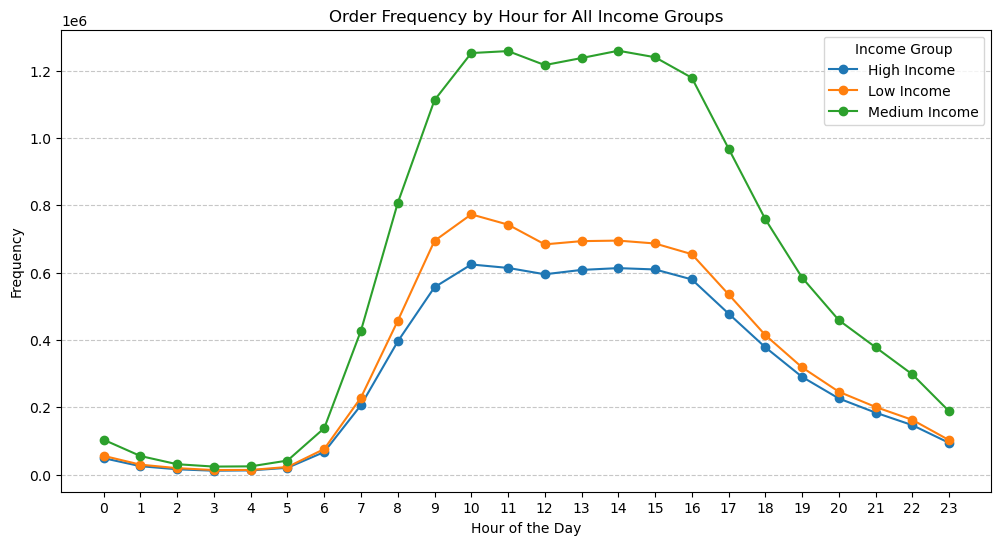

In [100]:
# Create a line chart for all three income groups
plt.figure(figsize=(12, 6))

for income_group in xcross_income_busiest_hours.columns:
    plt.plot(xcross_income_busiest_hours.index, xcross_income_busiest_hours[income_group], label=income_group, marker='o')

plt.title("Order Frequency by Hour for All Income Groups")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.legend(title="Income Group", loc='upper right')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

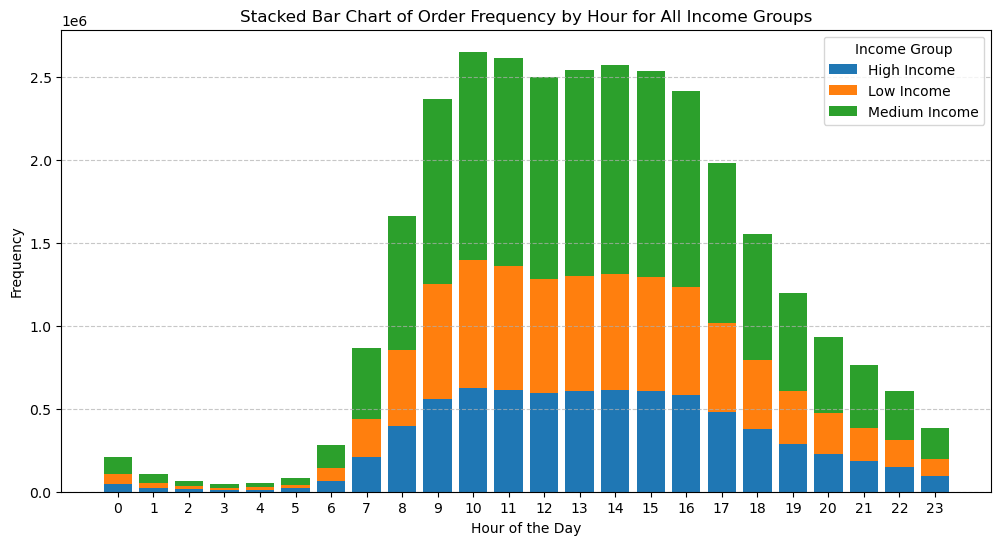

In [101]:
# Create a stacked bar chart for all three income groups
plt.figure(figsize=(12, 6))

# Calculate the bottom values for the stacked bars
bottom_values = None

for income_group in xcross_income_busiest_hours.columns:
    if bottom_values is None:
        plt.bar(xcross_income_busiest_hours.index, xcross_income_busiest_hours[income_group], label=income_group)
        bottom_values = xcross_income_busiest_hours[income_group]
    else:
        plt.bar(xcross_income_busiest_hours.index, xcross_income_busiest_hours[income_group], label=income_group, bottom=bottom_values)
        bottom_values += xcross_income_busiest_hours[income_group]

plt.title("Stacked Bar Chart of Order Frequency by Hour for All Income Groups")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.legend(title="Income Group", loc='upper right')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [72]:
active_cust_dpt.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,region,customer_activity,age_group,Income_Group,department,baby_stuff,alcohol,Family_Status_Flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,High active,Middle-aged Adults,High Income,beverages,0,0,Married with Dependants
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,False,196,1,0,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,False,196,6,1,Soda,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,High active,Middle-aged Adults,Low Income,beverages,0,0,Single no Dependants


In [103]:
 age_cat_agg = active_cust_dpt.groupby('age_group')[['days_since_last-order', 'prices']].agg(['min', 'max', 'mean'])

In [104]:
age_cat_agg

days_since_last-order                  prices        \
                                     min   max       mean    min   max   
age_group                                                                
Middle-aged Adults                   0.0  30.0  10.812500    1.0  25.0   
Senior Citizens                      0.0  30.0  10.796875    1.0  25.0   
Young Adults                         0.0  30.0  10.820312    1.0  25.0   

                              
                        mean  
age_group                     
Middle-aged Adults  7.789062  
Senior Citizens     7.796875  
Young Adults        7.785156

#Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [105]:
age_cat_agg1=active_cust_dpt.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})  

In [106]:
age_cat_agg1

prices           
                        mean  min   max
age_group                              
Middle-aged Adults  7.789062  1.0  25.0
Senior Citizens     7.796875  1.0  25.0
Young Adults        7.785156  1.0  25.0

In [107]:
age_cat_agg2=active_cust_dpt.groupby('age_group').agg({'days_since_last-order': ['mean', 'min', 'max']})  

In [108]:
age_cat_agg2

days_since_last-order           
                                    mean  min   max
age_group                                          
Middle-aged Adults             10.812500  0.0  30.0
Senior Citizens                10.796875  0.0  30.0
Young Adults                   10.820312  0.0  30.0

In [109]:
 income_cat_agg1=active_cust_dpt.groupby('Income_Group').agg({'prices': ['mean', 'min', 'max']})  

In [110]:
income_cat_agg1

prices           
                   mean  min   max
Income_Group                      
High Income    7.949219  1.0  25.0
Low Income     7.359375  1.0  25.0
Medium Income  7.957031  1.0  25.0

In [111]:
 income_cat_agg2=active_cust_dpt.groupby('Income_Group').agg({'days_since_last-order': ['mean', 'min', 'max']})  

In [112]:
income_cat_agg2

days_since_last-order           
                               mean  min   max
Income_Group                                  
High Income               10.742188  0.0  30.0
Low Income                10.937500  0.0  30.0
Medium Income             10.773438  0.0  30.0

In [113]:
 family_cat_agg1=active_cust_dpt.groupby('Family_Status_Flag').agg({'prices': ['mean', 'min', 'max']})  

In [114]:
family_cat_agg1

prices           
                                mean  min   max
Family_Status_Flag                             
Married with  Dependants    7.789062  1.0  25.0
Married with no Dependants  7.796875  1.0  25.0
Single no Dependants        7.789062  1.0  25.0
Single with Dependants      7.800781  1.0  25.0

In [115]:
 family_cat_agg2=active_cust_dpt.groupby('Family_Status_Flag').agg({'days_since_last-order': ['mean', 'min', 'max']})  

In [116]:
family_cat_agg2

days_since_last-order           
                                            mean  min   max
Family_Status_Flag                                         
Married with  Dependants               10.820312  0.0  30.0
Married with no Dependants             10.812500  0.0  30.0
Single no Dependants                   10.789062  0.0  30.0
Single with Dependants                 10.750000  0.0  30.0

In [121]:
department_cat_agg1=active_cust_dpt.groupby('department').agg({'prices': ['mean', 'min', 'max']}) 

In [122]:
department_cat_agg1

prices                     
                      mean       min        max
department                                     
alcohol           8.148438  1.000000  15.000000
babies            7.632812  1.000000  15.000000
bakery            7.855469  1.000000  15.000000
beverages         7.683594  1.000000  15.000000
breakfast         8.031250  1.000000  14.898438
bulk              8.343750  1.400391  14.101562
canned goods      7.546875  1.000000  15.000000
dairy eggs        8.335938  1.000000  15.000000
deli              7.781250  1.000000  15.000000
dry goods pasta   7.347656  1.000000  15.000000
frozen            7.734375  1.000000  15.000000
household         7.378906  1.000000  15.000000
international     7.679688  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.960938  1.099609  15.000000
pantry            8.015625  1.000000  20.000000
personal care     8.000000  1.000000  15.000000
pets              7.886719  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [123]:
department_cat_agg2=active_cust_dpt.groupby('department').agg({'days_since_last-order': ['mean', 'min', 'max']}) 

In [124]:
department_cat_agg2

days_since_last-order           
                                 mean  min   max
department                                      
alcohol                     10.007812  0.0  30.0
babies                       9.781250  0.0  30.0
bakery                      10.804688  0.0  30.0
beverages                   10.765625  0.0  30.0
breakfast                   11.000000  0.0  30.0
bulk                         9.882812  0.0  30.0
canned goods                11.320312  0.0  30.0
dairy eggs                  10.710938  0.0  30.0
deli                        11.054688  0.0  30.0
dry goods pasta             11.437500  0.0  30.0
frozen                      11.414062  0.0  30.0
household                   11.648438  0.0  30.0
international               10.960938  0.0  30.0
meat seafood                11.125000  0.0  30.0
missing                      9.867188  0.0  30.0
other                       10.625000  0.0  30.0
pantry                      10.835938  0.0  30.0
personal care               11.257812  0.0  30.0
pets                        11.593750  0.0  30.0
produce                     10.570312  0.0  30.0
snacks                      10.671875  0.0  30.0

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# age 

In [125]:
crosstab_age_vs_region = pd.crosstab(
    active_cust_dpt['age_group'],
    active_cust_dpt['region'],
    dropna=False,
    
)

In [126]:
crosstab_age_vs_region

region,Midwest,Northeast,South,West
age_group,,,,
Middle-aged Adults,2894197,2112381,4021260,3119927
Senior Citizens,2455443,1884229,3521421,2713411
Young Adults,1911873,1468075,2768458,2093889


In [130]:
crosstab_age_vs_departments = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['age_group'],
    dropna=False,
    
)

In [131]:
crosstab_age_vs_departments

age_group,Middle-aged Adults,Senior Citizens,Young Adults
department,,,
alcohol,56814,47596,40217
babies,164354,138738,107300
bakery,439661,382446,298721
beverages,1011215,883669,677017
breakfast,262776,227751,180323
bulk,13006,11424,9021
canned goods,396842,344447,270785
dairy eggs,2028369,1762512,1386301
deli,394029,343335,266470


In [132]:
# Sort the departments by values in descending order for the "Middle-aged Adults" age group
age_group_vs_department = crosstab_age_vs_departments.sort_values(by='Middle-aged Adults', ascending=False)

In [133]:
age_group_vs_department

age_group,Middle-aged Adults,Senior Citizens,Young Adults
department,,,
produce,3562053,3104118,2413102
dairy eggs,2028369,1762512,1386301
snacks,1085447,940733,740226
beverages,1011215,883669,677017
frozen,831204,728963,561564
pantry,698279,609961,474465
bakery,439661,382446,298721
canned goods,396842,344447,270785
deli,394029,343335,266470


# INCOME

In [134]:
crosstab_income_vs_region = pd.crosstab(
    active_cust_dpt['Income_Group'],
    active_cust_dpt['region'],
    dropna=False,
    
)

In [135]:
crosstab_income_vs_region

region,Midwest,Northeast,South,West
Income_Group,,,,
High Income,1763002,1308807,2442801,1886804
Low Income,1974266,1486808,2849538,2209921
Medium Income,3524245,2669070,5018800,3830502


In [137]:
crosstab_income_vs_department = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['Income_Group'],
    dropna=False,
    
)

In [138]:
crosstab_income_vs_department

Income_Group,High Income,Low Income,Medium Income
department,,,
alcohol,39537,39962,65128
babies,102279,95171,212942
bakery,277523,292666,550639
beverages,589724,804236,1177941
breakfast,155690,204191,310969
bulk,7330,10267,15854
canned goods,254052,248530,509492
dairy eggs,1258287,1363806,2555089
deli,240399,273839,489596


In [139]:
# Sort the departments by values in descending order for the "Medium Income" age group
income_group_vs_department = crosstab_income_vs_department.sort_values(by='Medium Income', ascending=False)

In [140]:
income_group_vs_department

Income_Group,High Income,Low Income,Medium Income
department,,,
produce,2184964,2358677,4535632
dairy eggs,1258287,1363806,2555089
beverages,589724,804236,1177941
snacks,576095,1021120,1169191
frozen,517558,564243,1039930
pantry,437454,462869,882382
bakery,277523,292666,550639
canned goods,254052,248530,509492
deli,240399,273839,489596


# family status


In [273]:
#family status distrubution
fam_status_distribution = active_cust_dpt.groupby(['Family_Status_Flag']).user_id.nunique().sort_index()

In [274]:
fam_status_distribution

Family_Status_Flag
Married with  Dependants      76161
Married with no Dependants    38135
Single no Dependants          40727
Single with Dependants         7608
Name: user_id, dtype: int64

[Text(0, 0, 'Married with  Dependants'),
 Text(1, 0, 'Married with no Dependants'),
 Text(2, 0, 'Single no Dependants'),
 Text(3, 0, 'Single with Dependants')]

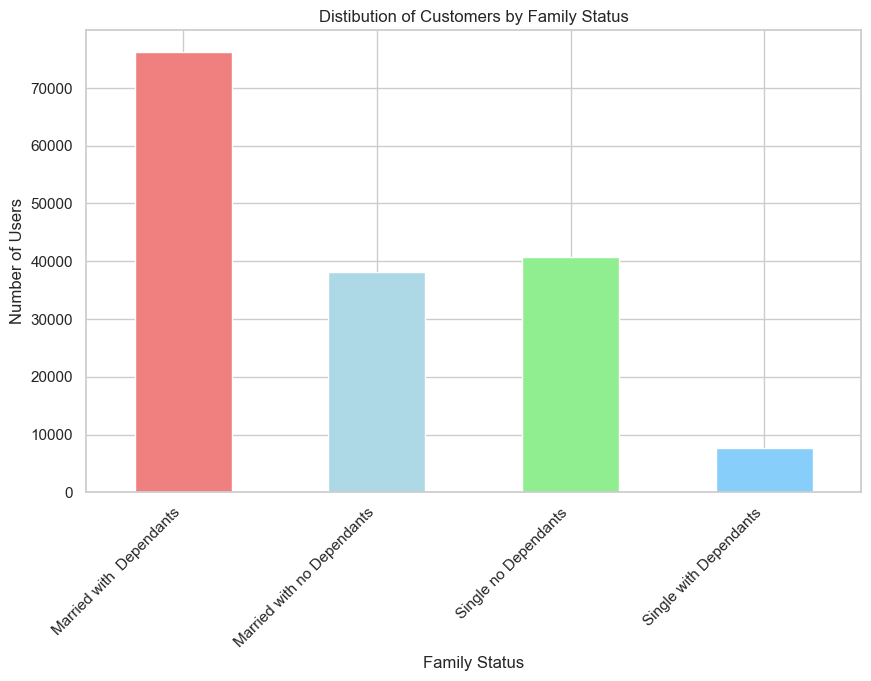

In [284]:
# Create a bar chart
bar_fam_customers=plt.figure(figsize=(10, 6))  # Set the figure size
ax = fam_status_distribution.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue'])

# Set the title and labels
plt.title('Distibution of Customers by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Users')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [286]:
# Exporting chart 
bar_fam_customers.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_fam_customers.png'))

In [278]:
# Count the occurrences 
fam_status_distribution_orders = active_cust_dpt['Family_Status_Flag'].value_counts()

In [279]:
fam_status_distribution_orders

Married with  Dependants      14532650
Single no Dependants           7739681
Married with no Dependants     7211061
Single with Dependants         1481172
Name: Family_Status_Flag, dtype: int64

[Text(0, 0, 'Married with  Dependants'),
 Text(1, 0, 'Single no Dependants'),
 Text(2, 0, 'Married with no Dependants'),
 Text(3, 0, 'Single with Dependants')]

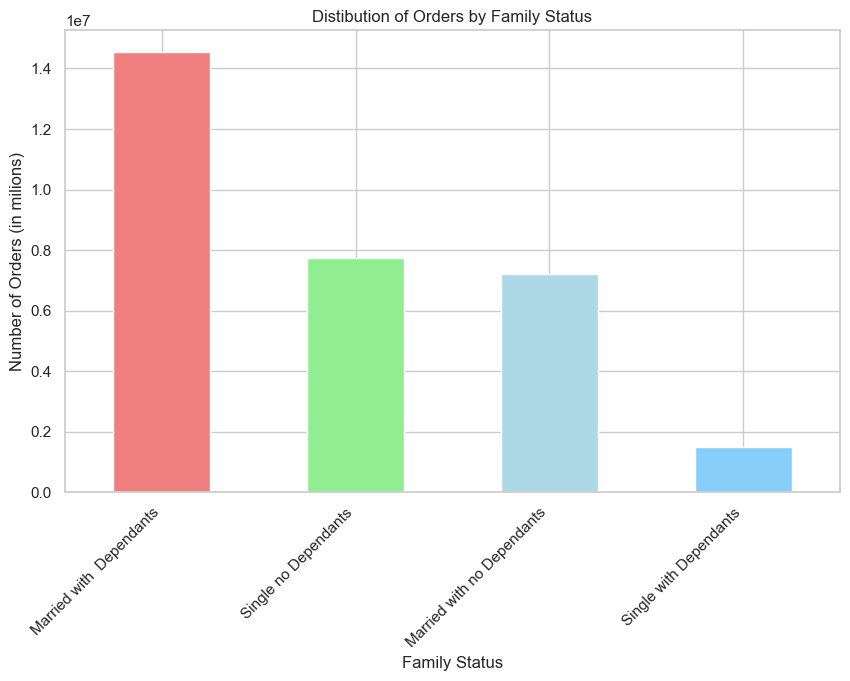

In [287]:
# Create a bar chart
bar_fam_orders=plt.figure(figsize=(10, 6))  # Set the figure size
ax = fam_status_distribution_orders.plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue', 'lightskyblue'])

# Set the title and labels
plt.title('Distibution of Orders by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Orders (in milions)')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [283]:
# Exporting chart 
bar_fam_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_fam_orders.png'))

In [141]:
crosstab_fam_status_vs_region = pd.crosstab(
    active_cust_dpt['Family_Status_Flag'],
    active_cust_dpt['region'],
    dropna=False,
    
)

In [142]:
crosstab_fam_status_vs_region

region,Midwest,Northeast,South,West
Family_Status_Flag,,,,
Married with Dependants,3367591,2564228,4854839,3745992
Married with no Dependants,1719671,1289545,2368910,1832935
Single no Dependants,1822816,1354482,2581933,1980450
Single with Dependants,351435,256430,505457,367850


In [143]:
crosstab_fam_status_vs_department = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    
)

In [144]:
crosstab_fam_status_vs_department

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
department,,,,
alcohol,66171,33250,36827,8379
babies,194848,92835,103328,19381
bakery,523567,262182,281395,53684
beverages,1209634,597819,645341,119107
breakfast,313272,157948,166432,33198
bulk,15724,8094,8000,1633
canned goods,476452,236125,251020,48477
dairy eggs,2421459,1211140,1294376,250207
deli,470594,231739,253382,48119


In [247]:
crosstab1_fam_status_vs_department = pd.crosstab(
    active_cust_dpt['department'],
    active_cust_dpt['Family_Status_Flag'],
    dropna=False,
    
)

In [248]:
crosstab1_fam_status_vs_department

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
department,,,,
alcohol,66171,33250,36827,8379
babies,194848,92835,103328,19381
bakery,523567,262182,281395,53684
beverages,1209634,597819,645341,119107
breakfast,313272,157948,166432,33198
bulk,15724,8094,8000,1633
canned goods,476452,236125,251020,48477
dairy eggs,2421459,1211140,1294376,250207
deli,470594,231739,253382,48119


In [250]:
sorted_crosstab1_fam_status_vs_department = crosstab1_fam_status_vs_department.sort_values(by="Single with Dependants", ascending=False)

In [252]:
sorted_crosstab1_fam_status_vs_department.head()

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants
department,,,,
produce,4262296,2110997,2275441,430539
dairy eggs,2421459,1211140,1294376,250207
snacks,1301249,643409,690438,131310
beverages,1209634,597819,645341,119107
frozen,999057,490333,529348,102993


# 9. Produce suitable charts to illustrate your results and export them in your project folder.

AGE / regions

Text(0.5, 1.0, 'Number of Orders by Age Group and Region')

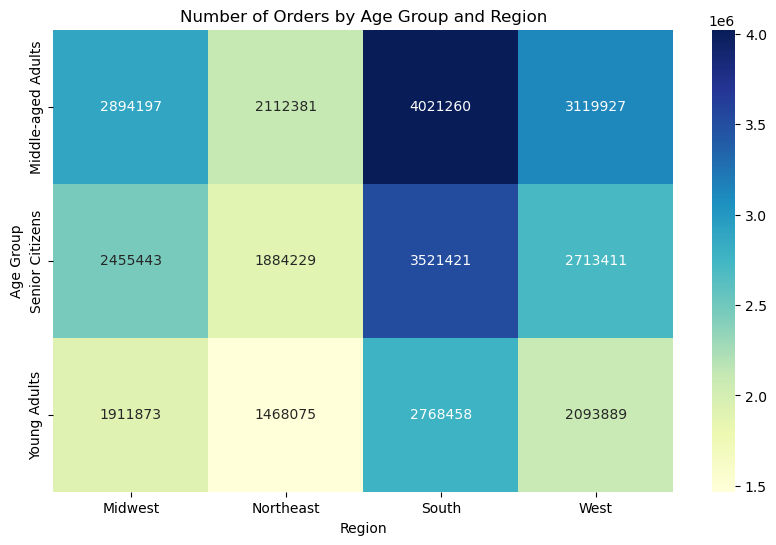

In [158]:
# Create a heatmap for number of orders by age groups and regions
age_region=plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_age_vs_region, annot=True, fmt="d", cmap="YlGnBu")

# Set labels and title
plt.xlabel("Region")
plt.ylabel("Age Group")
plt.title("Number of Orders by Age Group and Region")


In [160]:
# Exporting chart 
age_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_region_heatmap.png'))

Text(0.5, 1.0, 'Number of Orders by Age Group and Region')

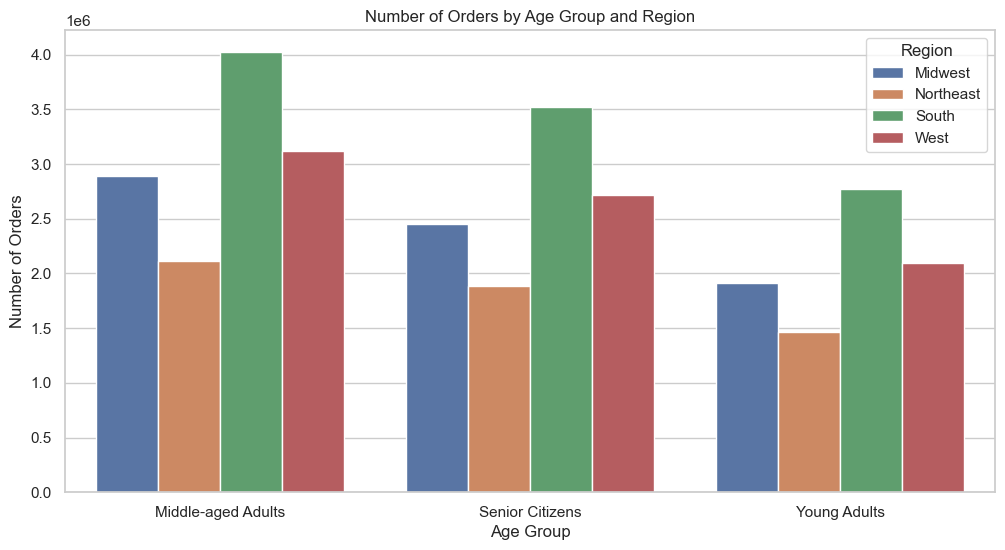

In [168]:
data = {
    'Age Group': ['Middle-aged Adults', 'Middle-aged Adults', 'Middle-aged Adults', 'Middle-aged Adults',
                  'Senior Citizens', 'Senior Citizens', 'Senior Citizens', 'Senior Citizens',
                  'Young Adults', 'Young Adults', 'Young Adults', 'Young Adults'],
    'Region': ['Midwest', 'Northeast', 'South', 'West',
               'Midwest', 'Northeast', 'South', 'West',
               'Midwest', 'Northeast', 'South', 'West'],
    'Number of Orders': [2894197, 2112381, 4021260, 3119927,
                         2455443, 1884229, 3521421, 2713411,
                         1911873, 1468075, 2768458, 2093889]
}

df = pd.DataFrame(data)

# Create a faceted bar chart
faceted_bar_chart=plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=df, x='Age Group', y='Number of Orders', hue='Region')

# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Age Group and Region")

In [170]:
# Exporting chart 
faceted_bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'faceted_bar_chart_age_region.png'))

AGE / departments

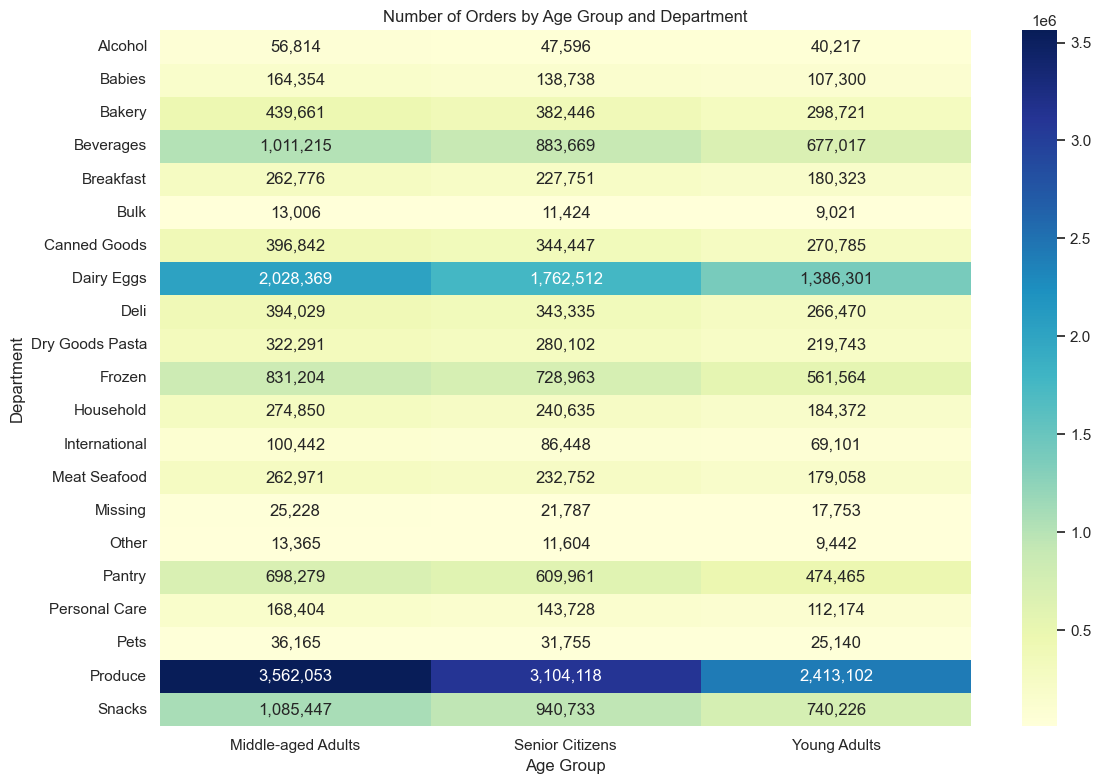

In [174]:
data = {
    "Department": ["Alcohol", "Babies", "Bakery", "Beverages", "Breakfast", "Bulk", "Canned Goods", "Dairy Eggs", "Deli", "Dry Goods Pasta", "Frozen", "Household", "International", "Meat Seafood", "Missing", "Other", "Pantry", "Personal Care", "Pets", "Produce", "Snacks"],
    "Middle-aged Adults": [56814, 164354, 439661, 1011215, 262776, 13006, 396842, 2028369, 394029, 322291, 831204, 274850, 100442, 262971, 25228, 13365, 698279, 168404, 36165, 3562053, 1085447],
    "Senior Citizens": [47596, 138738, 382446, 883669, 227751, 11424, 344447, 1762512, 343335, 280102, 728963, 240635, 86448, 232752, 21787, 11604, 609961, 143728, 31755, 3104118, 940733],
    "Young Adults": [40217, 107300, 298721, 677017, 180323, 9021, 270785, 1386301, 266470, 219743, 561564, 184372, 69101, 179058, 17753, 9442, 474465, 112174, 25140, 2413102, 740226]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the "Department" column as the index
df.set_index("Department", inplace=True)

# Create the heatmap
heat_map_age_department=plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=',', cbar=True)

# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Department")
plt.title("Number of Orders by Age Group and Department")

# Show the plot
plt.tight_layout()
plt.show()

In [172]:
crosstab_age_vs_baby_products = pd.crosstab(
    active_cust_dpt['age_group'],
    active_cust_dpt['baby_stuff'],
    dropna=False,
    
)

In [173]:
crosstab_age_vs_baby_products

baby_stuff,0,1
age_group,,
Middle-aged Adults,8299383,3848382
Senior Citizens,7200901,3373603
Young Adults,5654027,2588268


In [180]:
crosstab_age_vs_alcohol = pd.crosstab(
    active_cust_dpt['age_group'],
    active_cust_dpt['alcohol'],
    dropna=False,
    
)

In [181]:
crosstab_age_vs_alcohol

alcohol,0,1
age_group,,
Middle-aged Adults,11220993,926772
Senior Citizens,9792569,781935
Young Adults,7620512,621783


 # income/region

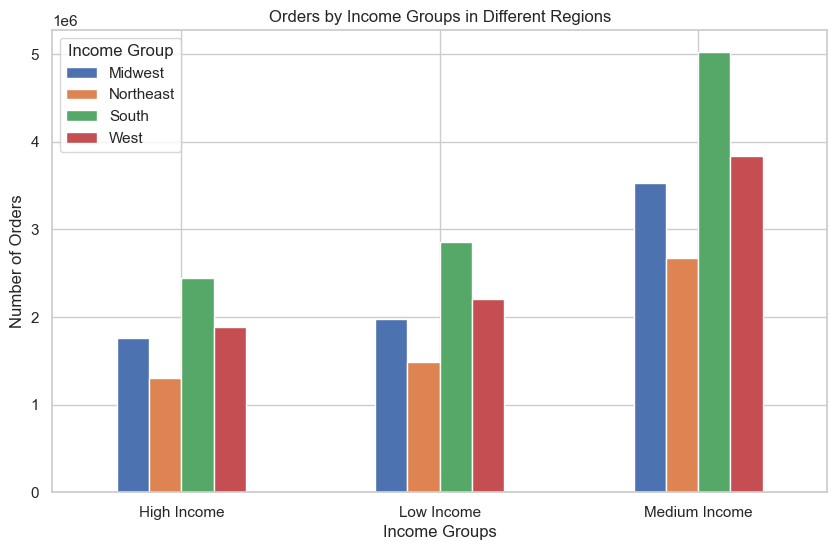

In [184]:
income_region=crosstab_income_vs_region.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("Orders by Income Groups in Different Regions")
plt.xlabel("Income Groups")
plt.ylabel("Number of Orders")
plt.legend(title="Income Group", loc="upper left")
plt.xticks(rotation=0)
plt.show()

In [185]:
# Exporting chart 
income_region.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_region_bar.png'))

income/department

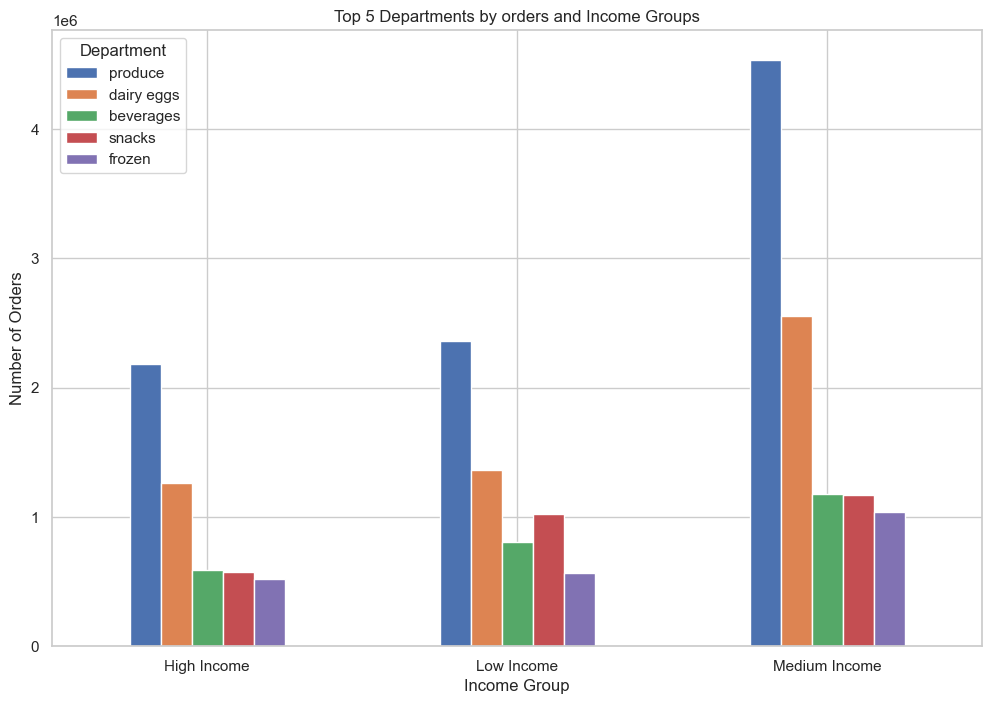

In [188]:
data = {
    "Income_Group": ["High Income", "Low Income", "Medium Income"],
    "produce": [2184964, 2358677, 4535632],
    "dairy eggs": [1258287, 1363806, 2555089],
    "beverages": [589724, 804236, 1177941],
    "snacks": [576095, 1021120, 1169191],
    "frozen": [517558, 564243, 1039930]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the "Income_Group" column as the index
df.set_index("Income_Group", inplace=True)

# Plot a grouped bar chart
income_department_top5=df.plot(kind="bar", figsize=(12, 8))
plt.title("Top 5 Departments by orders and Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Number of Orders")
plt.legend(title="Department", loc="upper left")
plt.xticks(rotation=0)
plt.show()

In [189]:
# Exporting chart 
income_department_top5.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_department_top5_bar.png'))

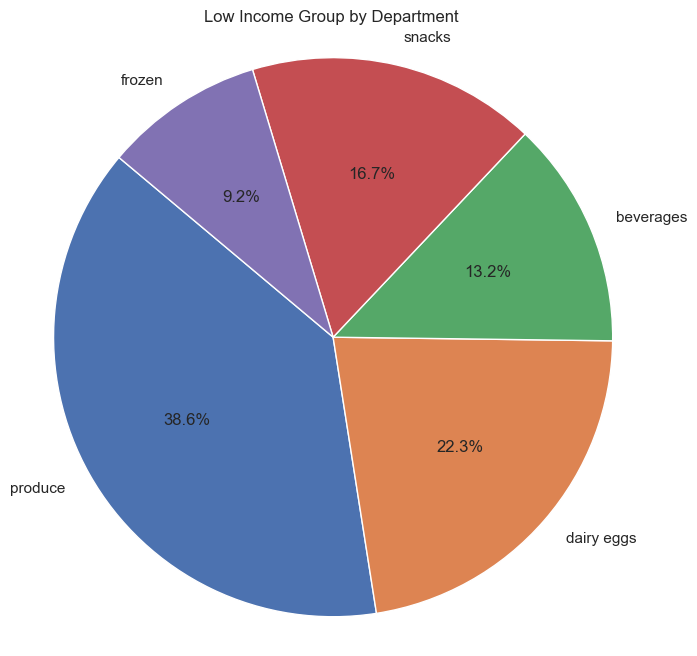

In [191]:
low_income_data = {
    "Department": ["produce", "dairy eggs", "beverages", "snacks", "frozen"],
    "Count": [2358677, 1363806, 804236, 1021120, 564243]
}

# Create a DataFrame
low_income_df = pd.DataFrame(low_income_data)

# Plot a pie chart
pie_low_income_departmens=plt.figure(figsize=(8, 8))
plt.pie(low_income_df["Count"], labels=low_income_df["Department"], autopct="%1.1f%%", startangle=140)
plt.title("Low Income Group by Department")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

In [193]:
# Exporting chart 
pie_low_income_departmens.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_low_income_departmens.png'))

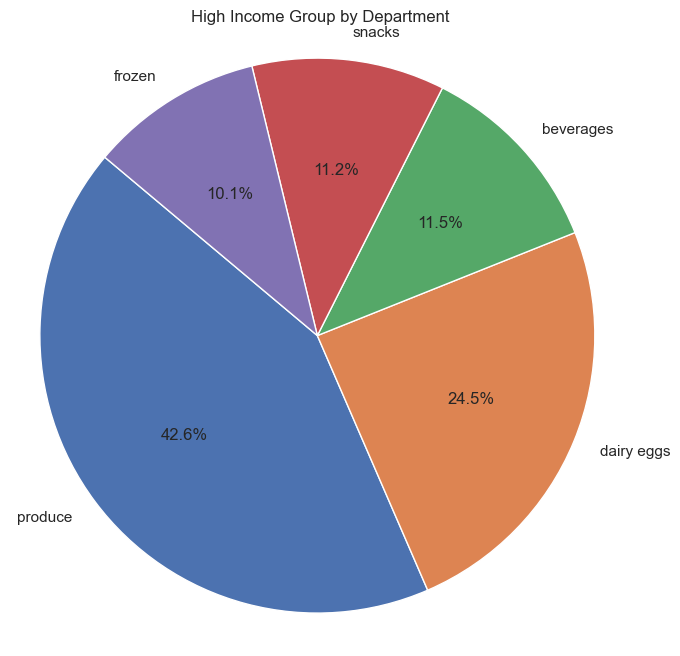

In [194]:
high_income_data = {
    "Department": ["produce", "dairy eggs", "beverages", "snacks", "frozen"],
    "Count": [2184964, 1258287, 589724, 576095, 517558]
}

# Create a DataFrame
high_income_df = pd.DataFrame(high_income_data)

# Plot a pie chart
pie_high_income_departmens=plt.figure(figsize=(8, 8))
plt.pie(high_income_df["Count"], labels=high_income_df["Department"], autopct="%1.1f%%", startangle=140)
plt.title("High Income Group by Department")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

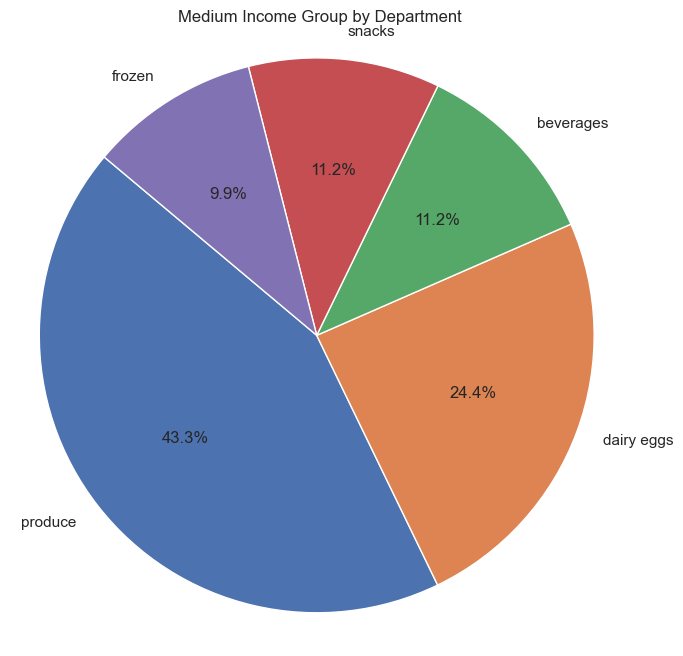

In [195]:
medium_income_data = {
    "Department": ["produce", "dairy eggs", "beverages", "snacks", "frozen"],
    "Count": [4535632, 2555089, 1177941, 1169191, 1039930]
}

# Create a DataFrame
medium_income_df = pd.DataFrame(medium_income_data)

# Plot a pie chart
pie_medium_income_departmens=plt.figure(figsize=(8, 8))
plt.pie(medium_income_df["Count"], labels=medium_income_df["Department"], autopct="%1.1f%%", startangle=140)
plt.title("Medium Income Group by Department")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

In [196]:
# Exporting chart 
pie_high_income_departmens.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_high_income_departmens.png'))

In [197]:
# Exporting chart 
pie_medium_income_departmens.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_medium_income_departmens.png'))

# Family status and region

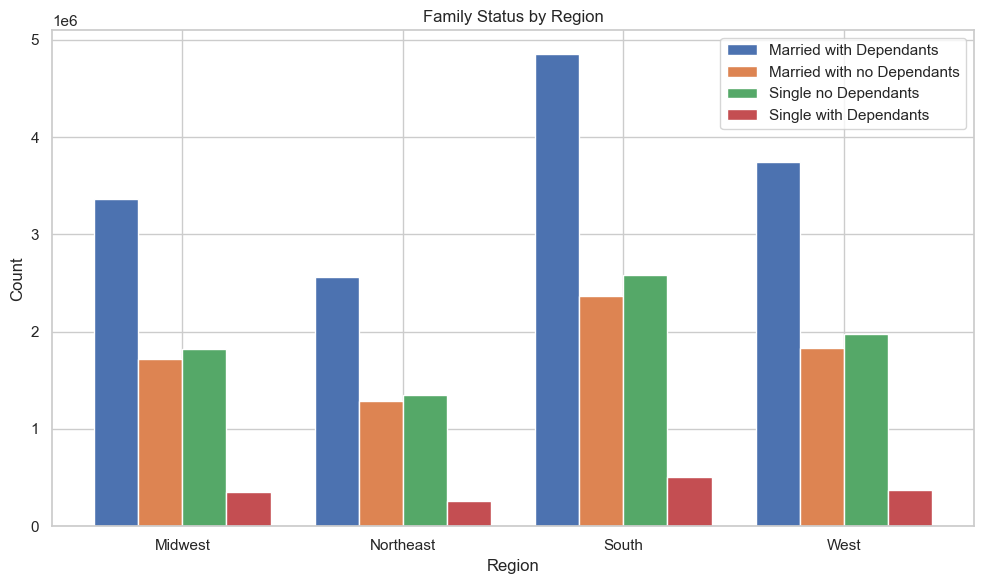

In [220]:
data = {
    "Region": ["Midwest", "Northeast", "South", "West"],
    "Married with Dependants": [3367591, 2564228, 4854839, 3745992],
    "Married with no Dependants": [1719671, 1289545, 2368910, 1832935],
    "Single no Dependants": [1822816, 1354482, 2581933, 1980450],
    "Single with Dependants": [351435, 256430, 505457, 367850]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(df["Region"]))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each family status
for i, family_status in enumerate(df.columns[1:]):
    ax.bar(index + (i * bar_width), df[family_status], bar_width, label=family_status)

# Set the labels and title
ax.set_xlabel("Region")
ax.set_ylabel("Count")
ax.set_title("Family Status by Region")
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(df["Region"])
ax.legend()

# Save the chart as a variable
bar_family_status_by_region_figure = fig
bar_family_status_by_region_axes = ax

# Show the chart
plt.tight_layout()
plt.show()

In [225]:
# Exporting chart 
bar_family_status_by_region_figure.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_family_status_by_region_figure.png'))

# Family status and departments

In [231]:
crosstab_fam_status_vs_department

Family_Status_Flag,Married with Dependants,Married with no Dependants,Single no Dependants,Single with Dependants,Total Orders
department,,,,,
produce,4262296,2110997,2275441,430539,9079273
dairy eggs,2421459,1211140,1294376,250207,5177182
snacks,1301249,643409,690438,131310,2766406
beverages,1209634,597819,645341,119107,2571901
frozen,999057,490333,529348,102993,2121731
pantry,835734,417222,443904,85845,1782705
bakery,523567,262182,281395,53684,1120828
deli,470594,231739,253382,48119,1003834
canned goods,476452,236125,251020,48477,1012074


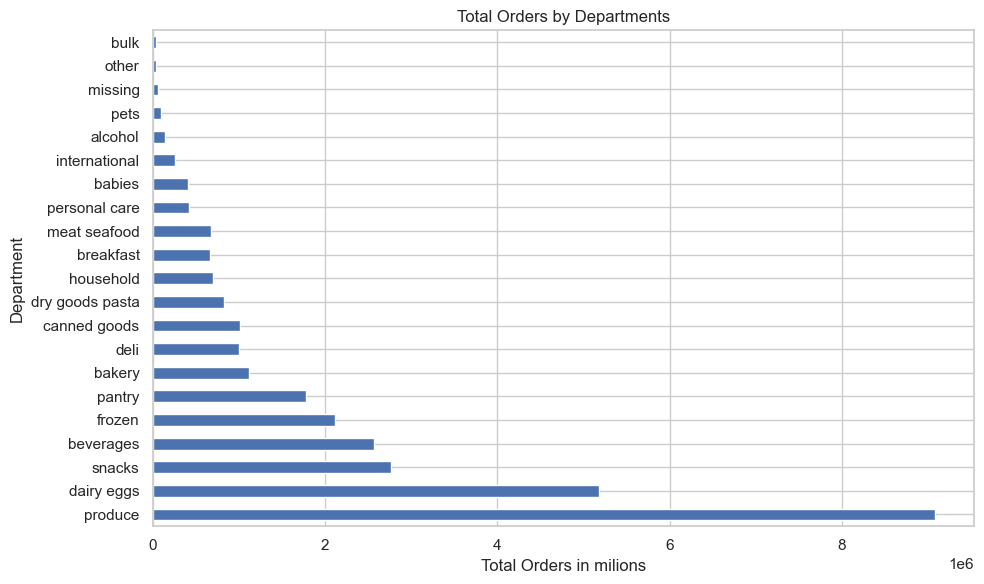

In [245]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_fam_status_vs_department1=crosstab_fam_status_vs_department["Total Orders"].plot(kind="barh", ax=ax, legend=False)
ax.set_xlabel("Total Orders in milions")
ax.set_ylabel("Department")
ax.set_title("Total Orders by Departments")

# Show the chart
plt.tight_layout()
plt.show()

In [246]:
# Exporting chart 
bar_fam_status_vs_department1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_fam_status_vs_department1.png'))

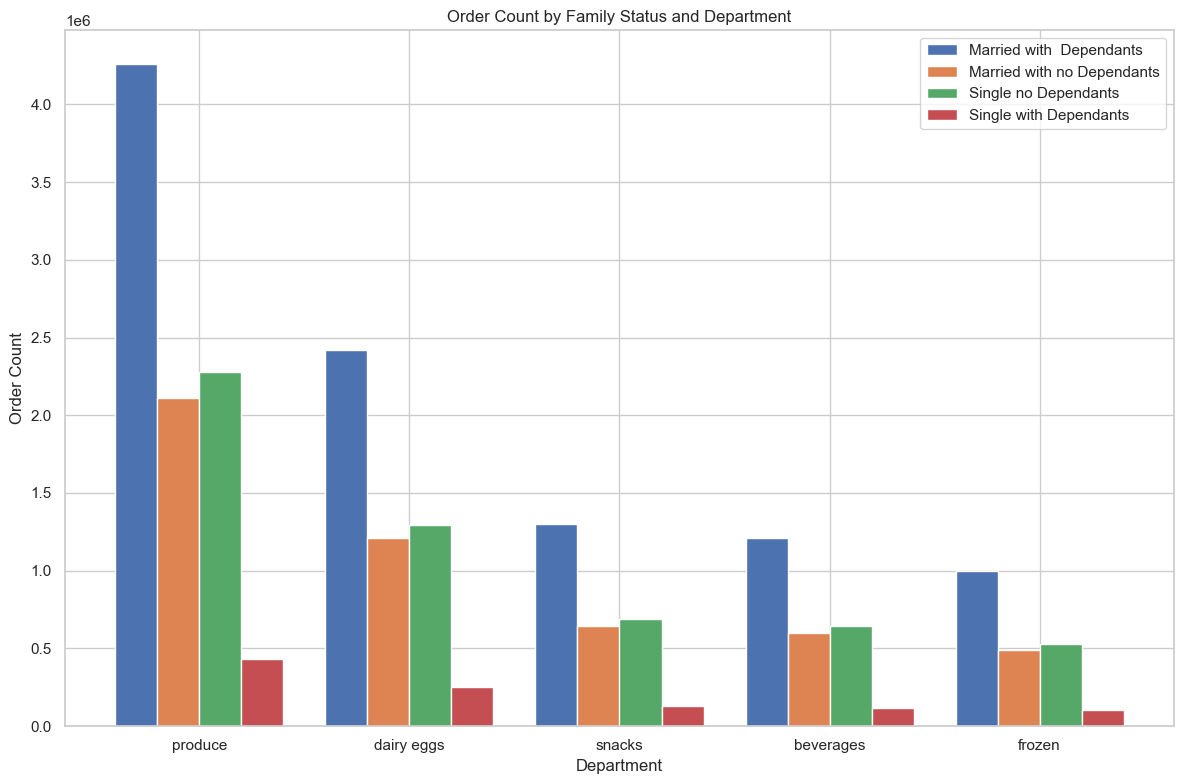

In [257]:
def create_grouped_bar_chart(dataframe, x_label, y_label, title):
    # Extract data from the DataFrame
    categories = dataframe.index
    num_categories = len(categories)
    family_statuses = dataframe.columns
    num_family_statuses = len(family_statuses)
    
    # Set the width of the bars and the positions for each category
    bar_width = 0.2
    index = np.arange(num_categories)
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create bars for each family status
    for i, family_status in enumerate(family_statuses):
        bars = ax.bar(index + (i * bar_width), dataframe[family_status], bar_width, label=family_status)

    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(index + (bar_width * (num_family_statuses - 1) / 2))
    ax.set_xticklabels(categories)
    ax.legend()
    
    # Show the chart
    plt.tight_layout()
    
    # Return the chart as a variable
    return fig

# Create the chart
grouped_bar_chart = create_grouped_bar_chart(
    sorted_crosstab1_fam_status_vs_department.head(),
    x_label="Department",
    y_label="Order Count",
    title="Order Count by Family Status and Department"
)







In [258]:
# Exporting chart 
grouped_bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'grouped_bar_chart_department_family_status.png'))